In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


In [24]:
file_path = "../resources/data/output/online_retail_rfm_dbscan.csv"   
df = pd.read_csv(file_path)

In [25]:
df.head()

,CustomerID,Frequency,Monetary,Recency,LogRecency,LogFrequency,LogMonetary
0,12346.0,1,77183.60,326,1.916496,-0.397035,8.363010
1,12347.0,182,4310.00,40,-0.568972,0.405694,0.251699
2,12348.0,31,1797.24,76,-0.256116,-0.263986,-0.027988
3,12349.0,73,1757.55,19,-0.751471,-0.077717,-0.032406
4,12350.0,17,334.40,311,1.786139,-0.326075,-0.190812


In [26]:
df.shape

(4338, 7)

In [27]:
df = df[['LogRecency', 'LogFrequency', 'LogMonetary']]

df.head()

,LogRecency,LogFrequency,LogMonetary
0,1.916496,-0.397035,8.363010
1,-0.568972,0.405694,0.251699
2,-0.256116,-0.263986,-0.027988
3,-0.751471,-0.077717,-0.032406
4,1.786139,-0.326075,-0.190812


In [28]:
df.shape

(4338, 3)

**DBSCAN**

In [29]:
def apply_dbscan(rfm_data, eps=0.5, min_samples=5):
    """Applies DBSCAN clustering on RFM scores."""
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
    cluster_labels = dbscan.fit_predict(rfm_data[['LogRecency', 'LogFrequency', 'LogMonetary']])

    # Create a copy of the DataFrame with the cluster labels
    rfm_dbscan = rfm_data.copy()
    rfm_dbscan['DBSCAN_Cluster'] = cluster_labels

    return rfm_dbscan

In [9]:
# DBSCAN clustering
# rfm_dbscan = apply_dbscan(df.head(200000)) # Working till 200k



In [30]:
eps_values = np.arange(0.1, 2.0, 0.1)  # Example range for eps
min_samples_values = np.arange(2, 10, 1)  # Example range for min_samples

best_score = -1
best_params = (None, None)

for eps in eps_values:
    for min_samples in min_samples_values:
        # Create DBSCAN model with the current parameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df.head(50000))

        # Only compute the silhouette score if there's more than 1 cluster
        if len(set(labels)) > 1:
            score = silhouette_score(df.head(50000), labels)
            print(f"eps: {eps}, min_samples: {min_samples}, silhouette_score: {score}")

            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

print(f"Best score: {best_score} with parameters eps: {best_params[0]}, min_samples: {best_params[1]}")

eps: 0.1, min_samples: 2, silhouette_score: -0.5746306124088968
eps: 0.1, min_samples: 3, silhouette_score: -0.49127015614578484
eps: 0.1, min_samples: 4, silhouette_score: -0.5060455051581527
eps: 0.1, min_samples: 5, silhouette_score: -0.3103278601000279
eps: 0.1, min_samples: 6, silhouette_score: -0.33409544451169243
eps: 0.1, min_samples: 7, silhouette_score: -0.11744533233448651
eps: 0.1, min_samples: 8, silhouette_score: -0.11773259675070431
eps: 0.1, min_samples: 9, silhouette_score: 0.10678480007190153
eps: 0.2, min_samples: 2, silhouette_score: -0.25812466859676286
eps: 0.2, min_samples: 3, silhouette_score: -0.16548005275788005
eps: 0.2, min_samples: 4, silhouette_score: -0.10288302014847087
eps: 0.2, min_samples: 5, silhouette_score: -0.10105395262380812
eps: 0.2, min_samples: 6, silhouette_score: 0.3589517981536388
eps: 0.2, min_samples: 7, silhouette_score: 0.37921720455738805
eps: 0.2, min_samples: 8, silhouette_score: 0.3742574200118744
eps: 0.2, min_samples: 9, silhouet

In [70]:
rfm_dbscan = apply_dbscan(df, eps=0.6, min_samples=2)

# rfm_dbscan

print("DBSCAN Clustering Labels:")
print(rfm_dbscan['DBSCAN_Cluster'].value_counts())


DBSCAN Clustering Labels:
DBSCAN_Cluster
 0    4298
-1      31
 1       3
 2       2
 3       2
 4       2
Name: count, dtype: int64


In [53]:
# rfm_dbscan

# print("DBSCAN Clustering Labels:")
# print(rfm_dbscan['DBSCAN_Cluster'].value_counts())

DBSCAN Clustering Labels:
DBSCAN_Cluster
 0    4204
-1      43
 2      40
 1      39
 4       6
 3       6
Name: count, dtype: int64


In [65]:
# Compute DBSCAN silhouette score
if len(rfm_dbscan['DBSCAN_Cluster'].unique()) > 1:
    dbscan_silhouette = silhouette_score(
        rfm_dbscan[['LogRecency', 'LogFrequency', 'LogMonetary']], 
        rfm_dbscan['DBSCAN_Cluster'])
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")
else:
    print("Not enough clusters for DBSCAN Silhouette Score.")

DBSCAN Silhouette Score: 0.582


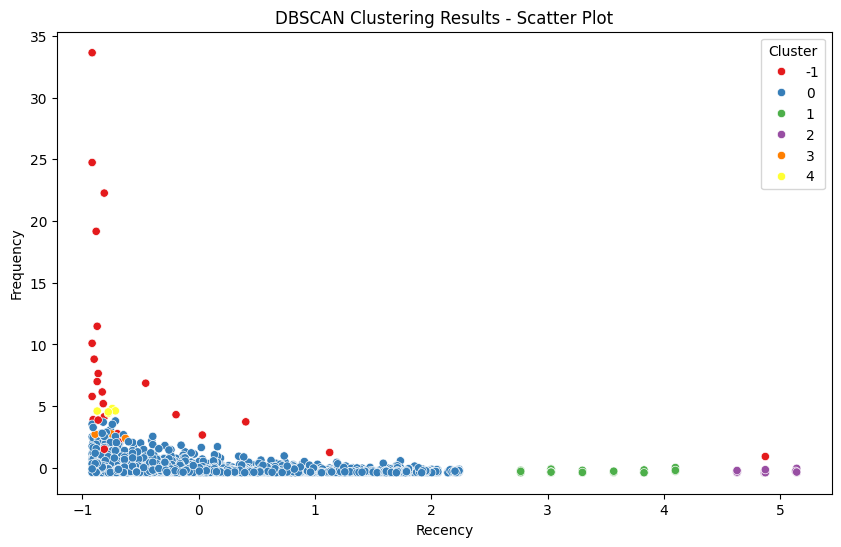

In [36]:

# Plotting a scatter plot for 'Recency' vs. 'Frequency'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_dbscan, x='LogRecency', y='LogFrequency', hue='DBSCAN_Cluster', palette='Set1')

# Adding labels and title
plt.title('DBSCAN Clustering Results - Scatter Plot')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Cluster')

# Show plot
plt.show()